In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [265]:
data = pd.read_json('logins.json')

In [266]:
data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


## Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

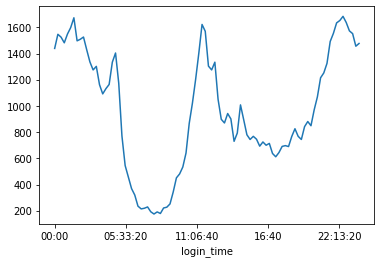

In [267]:
daily_data = data.copy()
daily_data = daily_data.groupby(pd.Grouper(key='login_time', freq='15min')).login_time.count()
daily_data = daily_data.reset_index(name='login_count')
daily_data.login_time = daily_data.login_time.dt.time 
daily_data = daily_data.groupby('login_time').login_count.sum()
daily_data.plot()
plt.show()

When graphing the daily pattern of login times, we can see a stark dropoff of activity between ~4:00 AM-11:00AM. This is followed by a spike in activity at 11:00 AM, then a dip in the afternoon before picking up again around 10:00 PM. This seems to indicate that these times are the most active for the website for logged users.

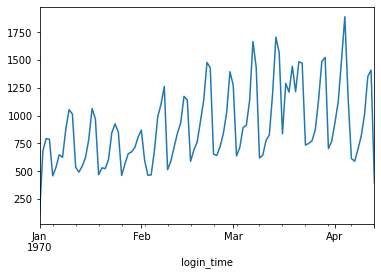

In [268]:
data.groupby(pd.Grouper(key='login_time', freq='D')).login_time.count().plot()
plt.show()

If we zoom out and view a longer-term trend, we can see there seem to be trends that may relate to the day of the week as well as the time of the year.

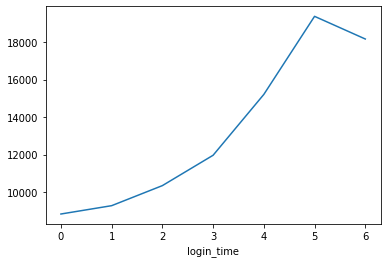

In [269]:
data.groupby(data.login_time.dt.weekday).login_time.count().plot()

Indeed, we can see that there is a strong trend throughout the week, with activity peaking on the weekend, then crashing on Mondays. This is worth noting, as this may somewhat bias activity patterns by creating more late night activity that only exists on the weekend days.

## Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    1. how you will implement the experiment
    2. what statistical test(s) you will conduct to verify the significance of the observation
    3. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

The main measure of success I would consider for this promotion would be whether the costs incurred by absorbing the tolls of drivers was outpaced by the additional revenues brought in by connecting these two cities. As a business, it is important to find as much profit as possible by changing behaviors to suit present circumstances, but if the additional revenue does not make up for the spend then there is little point in the promotion.

In order to test whether the promotion is worthwhile, I would suggest an AB test framework conducted in two parts. For each city, a relatively small subset of drivers would be selected to receive the promotion and their revenues would be observed and compared to a group of drivers who did not receive the promotion. If it were possible, a matched study design could be conducted by choosing pairs of drivers with similar geographical ranges and production.

If a matched design was possible, I would use a paired T-test to compare the revenues of the selected drivers (minus the money spent on tolls) with their unselected paired counterparts. If the result is significant, it is evidence that profits were increased by the promotion by an amount greater than the amount invested in the tolls. It would be imperative that this analysis be provided for each city since each city displays very different characteristics.

If the results are significant, I would recommend that the city operataions team proceed with the full promotion in a staged rollout to progressively more drivers over time, during which these trends would continue to be monitored for any changes.

One caveat I would offer would be that if user engagement or brand awareness is the primary goal of the promotion (and not revenue) that a smaller effect size may be acceptable to the stakeholders. It is important to be clear about the desired effect of the campaign.

## Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

In [270]:
cohort_data = pd.read_json('ultimate_data_challenge.json')

In [271]:
cohort_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [272]:
cohort_data.signup_date = pd.to_datetime(cohort_data.signup_date)
cohort_data.last_trip_date = pd.to_datetime(cohort_data.last_trip_date)

In [273]:
cohort_data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


We can first note that a significant number of drivers do not have an average rating (roughly 20% of all drivers). 

In [274]:
null_rating = cohort_data[cohort_data.avg_rating_of_driver.isnull()]
null_rating.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
6,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,Android,0.0,False,100.0,3.95,4.0
9,Winterfell,1,2014-01-03,NaN,1.0,2014-01-05,Android,0.0,False,0.0,2.37,5.0
12,Winterfell,1,2014-01-15,NaN,1.0,2014-03-12,iPhone,0.0,False,100.0,20.29,5.0
14,Astapor,1,2014-01-27,NaN,1.0,2014-01-28,Android,0.0,False,100.0,26.01,5.0
15,Winterfell,1,2014-01-15,NaN,1.0,2014-01-16,Android,0.0,True,100.0,13.20,5.0


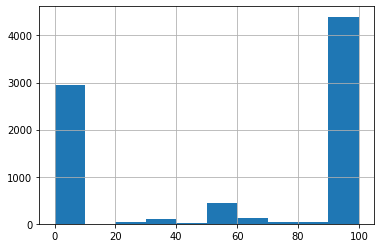

In [275]:
null_rating.weekday_pct.hist()

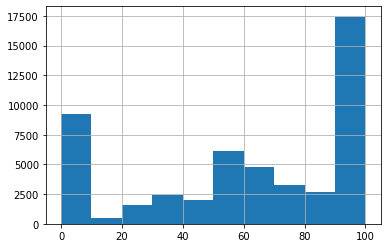

In [276]:
cohort_data.weekday_pct.hist()

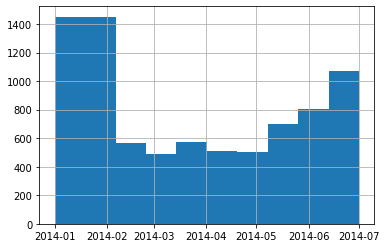

In [277]:
null_rating.last_trip_date.hist()

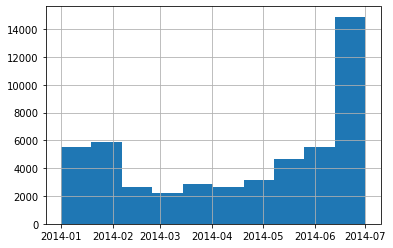

In [278]:
cohort_data.last_trip_date.hist()

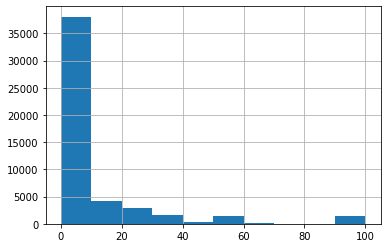

In [279]:
cohort_data.surge_pct.hist()

Looking more closely at this subset of drivers, they appear to disproportionately have taken their last trip longer in the past than the drivers with driver ratings. This seems to indicate that there may be a structural issue in the data. We should attempt to retain these rows as they are biased in a specific direction.

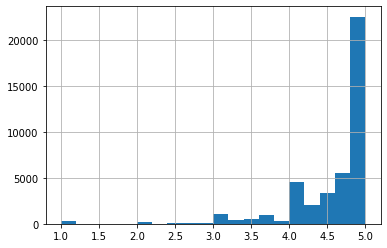

In [280]:
cohort_data.avg_rating_of_driver.hist(bins=20)
plt.show()

Most drivers seem to have similar scores, with a median score of 4.9. We can impute the driver scores at this level, but since they comprise such a large amount of the dataset, we may wish instead to simply choose a classification method that does well with missing data. We should give thought to tree-based approaches like random forests and xgboost as a way to take this into account.

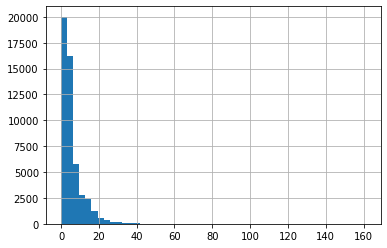

In [281]:
cohort_data.avg_dist.hist(bins=50)

We can also see some evidence of outliers in the average distance driven.

In [282]:
sum(cohort_data.avg_dist > 80)

2

Only two drivers have driven more than 80 miles per trip in their first 30 days after startup. This is a large deviation from the norm, but it is not so huge as to bias the dataset. There is a good chance it may be a real trend, so we allow these points to remain in the dataset.

In [283]:
is_active = cohort_data.last_trip_date > '2014-06-01'
sum(is_active) / len(cohort_data)

0.3662

We can see that roughly 37% of the users are active, having taken a ride in the last 30 days tracked before the end of data collection. This vector will serve as our outcome variable.

In [284]:
cohort_data.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [285]:
# Variable recoding
cohort_data.signup_date = cohort_data.signup_date.dt.dayofyear

In [297]:
cohort_recode = pd.concat([pd.get_dummies(cohort_data.city),
                           pd.get_dummies(cohort_data.phone),
                           cohort_data.drop(['city', 'phone', 'last_trip_date'], axis=1)],
                           axis=1)

In [301]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cohort_recode,
                                                    is_active,
                                                    test_size=0.2)

In [303]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=1, learning_rate=0.01)
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.7804

The XGBoost model achieves roughly 80% accuracy, which is respectable but not necessarily as good as it could be. Given more time we could invest effort in more extensive parameter tuning, but for a fast model, this is a passable result.

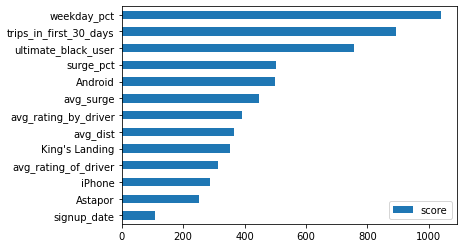

In [316]:
feature_import = xgb.get_booster().get_score(importance_type='weight')
(pd.DataFrame(data=feature_import.values(),
             index=feature_import.keys(),
             columns=['score'])
 .sort_values(by='score')
 .plot(kind='barh'))

plt.show()

From analyzing the feature importances from the XGBoost model, we can see the variables that were the most influential in identifying which passengers would continue to use the service six months later. Though the default XGBoost output does not infer directionality of trend, we can take a few broad trends from this analysis that may be of interest to stakeholders:

#### Passengers who used the service on weekdays seemed to be more likely to continue as customers

This may mean that incentivization of using the service on weekdays early after enrollment may lead to attracting more long-term customers. Perhaps this is related to commuting behaviors, and can be traced to specific communities or urban centers.

#### Passengers who took a large number of trips in their first 30 days

This feature is also high in importance, seeming to indicate that if users took more trips in their first 30 days they were likely to have increased adoption over time. The presence of the ultimate_black_user category in the first 30 days also seems to indicate that early engagement with the service is impaortant for customer retention.

#### The percentage of trips taken during surge pricing hours makes a difference

Again, we cannot infer directionality from this analysis, but the surge-related behavior of riders seems to make a difference. Depending on further analysis, it may be prudent to increase or decrease the amount of surge pricing time that is available in order to retain a greater number of customers.

#### Android phone users seem to have habits that differ from iPhone users

The type of phone that riders use seems to have a considerable effect on their likelihood to become a regular app user. While this analysis does not give the specifics of these trends, there is evidence that research into the lifestyle or spending preferences of these two groups may lead to interesting information on how to retain a greater number of riders.